In [1]:
from ecbdata import ecbdata

df = ecbdata.get_series('ICP.M.U2.N.000000.4.ANR', 
                        start='2010-01')

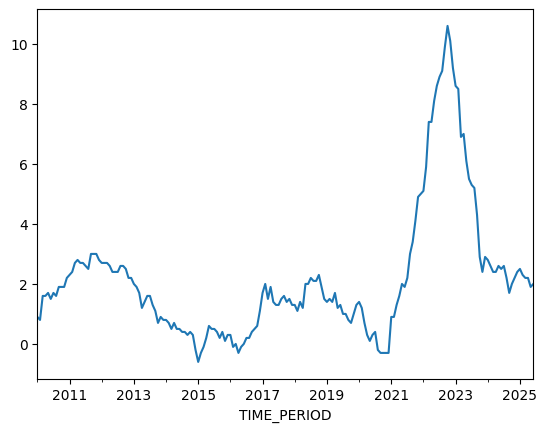

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df.TIME_PERIOD = pd.to_datetime(df.TIME_PERIOD)
df = df.set_index('TIME_PERIOD')
df.OBS_VALUE.plot()
plt.show()

✔️ Supporta tutti i dataset principali (QSA, ICP, MNA…)

✔️ Restituisce direttamente un DataFrame

⚠️ Non ha un sistema di esplorazione DSD: devi conoscere il codice della serie

In [ ]:
from ecbdata import ecbdata

df = ecbdata.get_series('QSA.Q.N.IT.W0.S11.S1.N.L.LE.F3T4.T._Z.XDC._T.S.V.N._T')
(df.head())


In [17]:
from pandasdmx import Request

# Client SDMX verso BCE
client = Request('ECB')

# Leggi dataset QSA
data_msg = client.data(
    resource_id='QSA',
    key='A.N.IT.W0.S11.S1.N.L.LE.FPT.T._Z.XDC_R_F._T.S.V.N._T',
    params={'startPeriod': '2010'}
)

# Estrai i dati come DataFrame
df = data_msg.to_pandas()
print(df.tail())


ImportError: cannot import name 'make_generic_validator' from 'pydantic.class_validators' (C:\Users\paolo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pydantic\class_validators.py)

In [18]:
import pandas as pd
import requests
from io import StringIO

url = "https://data.ecb.europa.eu/sdmx/REST/data/QSA/Q.N.IT.W0.S11.S1.N.L.LE.F3T4.T._Z.XDC._T.S.V.N._T?format=csvdata"
res = requests.get(url)

# Trova automaticamente la riga dell'header (quella con "TIME_PERIOD" ecc.)
lines = res.text.splitlines()
for i, line in enumerate(lines):
    if "TIME_PERIOD" in line:
        header_row = i
        break

# Usa skiprows per saltare le righe prima dell'intestazione
df = pd.read_csv(StringIO(res.text), skiprows=header_row)

df.head()



NameError: name 'header_row' is not defined

In [11]:
import pandas as pd
import requests
from io import StringIO

url = "https://data.ecb.europa.eu/sdmx/REST/data/QSA/Q.N.IT.W0.S11.S1.N.L.LE.F3T4.T._Z.XDC._T.S.V.N._T?format=csvdata"
res = requests.get(url)
df = pd.read_csv(StringIO(res.text))


ParserError: Error tokenizing data. C error: Expected 1 fields in line 6, saw 10
